<a href="https://colab.research.google.com/github/CydMiller/StableMarriage_Exploration/blob/main/Stable_Marriage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Stable Marriage Problem**

**Research Question**

What trade-offs emerge between deterministic stability and computational efficiency for the Stable Marriage Problem and its related problems?

## Gale Shapley Algorithm

**Procedure in Plain English**

"**Step 1:** Every man proposes to the first woman on his list of preferences. Every woman conditionally accepts the proposal from the man she most prefers out of those who have proposed. She rejects the other proposals.


**Step k:** Every man who is not conditionally engaged proposes to the woman he most prefers out of those who have not yet rejected him. Every woman considers any new men who have proposed at this step and any man she had previously accepted and accepts the proposal from the man she most prefers, even if that means rejecting the man she had previously accepted.


**End:** This process continues until every woman has accepted a proposal at which time the conditional acceptances become final. At this step, the algorithm ends and w = x(m) if w has accepted m." (Austin)

**Theoretical Analysis of the Gale Shapley Algorithm**

- Input Size: *n* men = *n* women
- Basic Operation: A proposal made by a man to a woman (and the woman comparing two men). Each man can propose to at most *n* women.

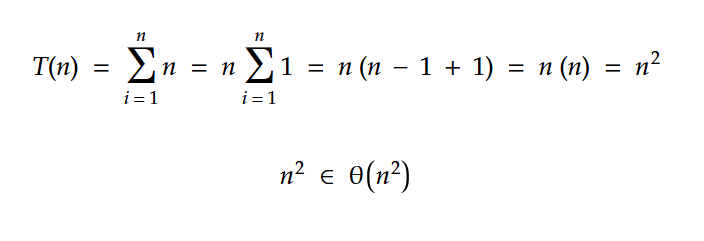
- Therefore, this algorithm is of quadratic running time.

In [1]:
# @title Code for Gale Shapely Algorithm
def gale_shapely(men_prefs, women_prefs):

  # number of men = number of women
  n = len(men_prefs)

  # Keep track of who is free (unengaged)
  free_men = list(men_prefs.keys())

  # Store the current engagements: {woman: man}, starts as an empty dictionary
  engagements = {}

  # Store the next woman each man will propose to
  next_proposal = {m: 0 for m in men_prefs.keys()}

  # While there are still free men
  while free_men:
    # Choose an arbitrary man to be the initializer
    man = free_men[0]

    # Man proposes to next woman on his list
    woman = men_prefs[man][next_proposal[man]]
    next_proposal[man] += 1

    # If the woman is free, they become engaged
    if woman not in engagements:
        engagements[woman] = man
        free_men.remove(man)
    else:
        # Woman is already engaged, check if new man is better
        current_fiance = engagements[woman]

        # Get the preference lists for the woman
        # women_prefs[woman].index(man) gives preference rank of 'man'
        # women_prefs[woman].index(current_fiance) gives preference rank of 'current_fiance'

        if women_prefs[woman].index(man) < women_prefs[woman].index(current_fiance):
            # Woman prefers the new man
            engagements[woman] = man
            free_men.remove(man)
            # The old fiance becomes free again
            free_men.append(current_fiance)
        # Else, woman prefers her current fiance, man remains free and proposes next time

    # Reformat engagements from {woman: man} to {man: woman}
    stable_matching = {v: k for k, v in engagements.items()}

  return stable_matching

## Randomized Serial Dictatorships (RSD with and without heaps)

The RSD algorithm is a mechanism used for one-sided matching, where only one of the sets involved has a preference list, and is commonly demonstrated with an analogy of agents to houses, where the agents have a preference of which house they obtain, but the houses do not have a preference over which agent it receives. It becomes apparent, then, that this algorithm is a poor solution to the Stable Marriage Problem because it does not account for the women's preferences in constructing its marriages. So for this experiment, we are using this algorithm strictly to compare running time efficiency and applications of similar problems, and we acknowledge that this algorithm would not be used to solve the Stable Marriage Problem in practice.

### Random Serial Dictatorship (RSD)

**Procedure in Plain English**

**Step 1:** "Pick an *arbitrary* ordering of the [men] and all [women] are marked [unengaged]." (Kun)

**Step k:** "...the first [man] in the ordering picks their top choice, and you remove their choice from the [unengaged women]." (Kun)

**End:** Reached after each man has selected a partner or exhausted his list. Each man gets his most preferred **available** woman, but not necesarily the top of his list since she may already be taken.

**Theoretical Analysis of Randomized Serial Dictatorship**

- Input Size: *n* men = *n* women
- Basic Operation: Man checking whether a woman is available. *n* men scan their list of *n* women.

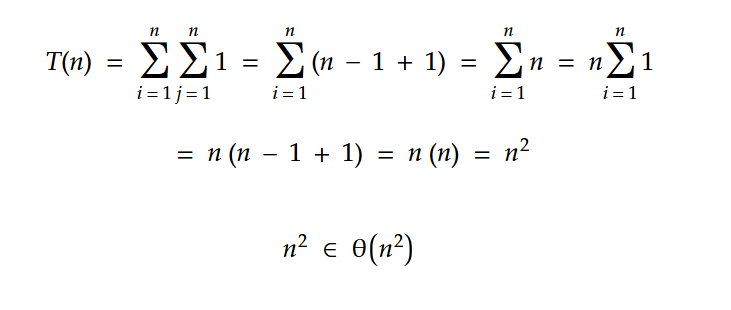
- Therefore, this algorithm is of quadratic running time.

In [2]:
# @title Code for Randomized Serial Dictatorship (RSD)
import random

def randomized_serial_dictatorship(men_prefs, women_prefs):

    # Create the list of men
    men = list(men_prefs.keys())

    # Track available women (not already engaged)
    women = set(women_prefs.keys())

    # Random order of proposing men
    random.shuffle(men)

    # Store the current engagements: {woman: man}, starts as an empty dictionary
    engagements = {}

    # For each man in the list
    for m in men:
        # Pick the first woman in m's preference list who is still available
        for w in men_prefs[m]:
            if w in women:
                engagements[m] = w
                women.remove(w)
                break

    return engagements


### Random Serial Dictatorship (RSD) with Heaps

**Procedure in Plain English**

**Step 1:** "Pick an *arbitrary* ordering of the [men] and all [women] are marked [unengaged]." (Kun) **For each man, convert his preference list into a min-heap so that his most-preferred remaining woman can be retrieved efficiently.**

**Step k:** Take the next man in random order and repeatedly pop the top item from his heap. The man picks the first woman from the heap who is still unengaged, then she is removed from the set of availble women.

**End:** Reached after each man has selected a partner from his heap. Each man gets his most preferred **available** woman, but not necesarily the top of his list since she may already be taken.

**Theoretical Analysis of Randomized Serial Dictatorship (with heaps)**

- Input Size: *n* men = *n* women
- Basic Operation: Heap pop from a man's heap (can cost up to O(logn)) and a man can pop up to n times.

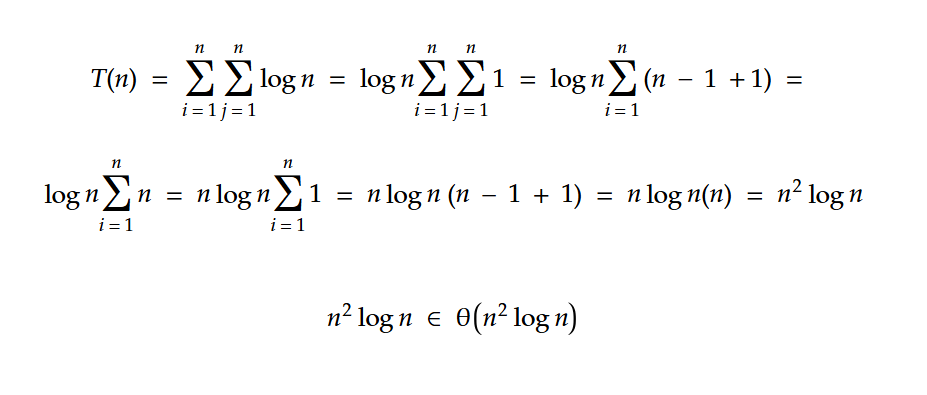
- Therefore, this algorithm is of n<sup>2</sup> log n running time.

In [3]:
# @title Code for Randomized Serial Dictatorship (with heaps)
import random
import heapq

def RSD_with_heaps(men_prefs, women_prefs):
    # Create the list of men
    men = list(men_prefs.keys())

    # Track available women (not already engaged)
    women = set(women_prefs.keys())

    # Random order of proposing men
    random.shuffle(men)

    # Convert each man's preference list into a heap for fast access
    men_heaps = {}

    # For each man in the list
    for m in men:
        # Assign a random priority to each woman to break ties randomly
        men_heaps[m] = [(i, w) for i, w in enumerate(men_prefs[m])]
        heapq.heapify(men_heaps[m])

    # Store the current engagements: {woman: man}, starts as an empty dictionary
    engagements = {}

    # For each man in the list
    for m in men:
        while men_heaps[m]:
            # '_' here essentially means "There is a value here, but we don't care about it"
            # (only one value in the tuple is useful)"
            _, w = heapq.heappop(men_heaps[m])
            if w in women:
                engagements[m] = w
                women.remove(w)
                break

    return engagements


## Irving's Algorithm

This algorithm does not take in two preference lists, and instead takes in a single set of even cardinality *n*. Each member in the set ranks all others in order of preference, and a stable matching is a partition of this single set into n/2 pairs of roommates such that no two people who are not roommates both prefer each other to their actual partners. For this algorithm, there exists intances for which no stable matching is possible. (Irving)

**Procedure in Plain English**

**=== Phase One ===**

**Step 1:** Everyone is initialized as unmatched.

**Step k:** A person proposes to the first name on their list. The receiver checks whether this proposer is acceptable.
- If the receiver has already removed the proposer earlier, the proposer deletes the receiver and must try again later.
- Otherwise, the receiver keeps the proposer and removes *everyone they prefer less.*

Whenever someone is removed from another's list, they also remove the trimmer from their own list, which may cause some people to become free again and re-propose to their next top choice.

**End:** Reached when no one is free or someone's list becomes empty, which implies **no stable matching exists.**

**=== Phase 2 ===**

**Step 1:** If a person has more than one name remaining, the following relationship is used:
- A person "points to" to the **first** person on their list.
- That person "points back" using the **last** name on their list.

**Step k:** If a person A points to B and B points back to someone other than A, then:
- A and B cannot be part of any stable matching.
- They delete each other from their lists.

**End:** Reached when no more changes occur or someone's list becomes empty, which implies **no stable matching exists.**

**=== Check for Stable Matching ===**

If everyone's list contains exactly one remaining candidate, we construct the matching. If any list has more or fewer than one name, this implies **no stable matching exists.**

**Theoretical Analysis of Irving's Algorithm**

- Input Size: *n* participants
- Basic Operation: A deletion of a person from another's preference list. There are *n* participants each with a list of at most *n - 1* others.

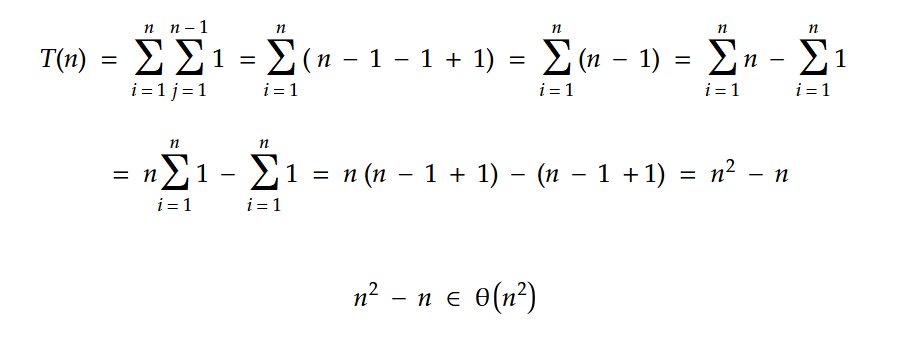
- Therefore, this algorithm is of quadratic running time.

In [4]:
# @title Code for Irving's Algorithm (Stable Roommates Problem)
def irving_algorithm(preferences):

    # Make deep copies of preference lists (we’ll modify them)
    prefs = {p: lst.copy() for p, lst in preferences.items()}

    # ---------- Phase 1: Proposal and rejection phase ----------
    free = list(prefs.keys())

    while free:
        person = free.pop(0)
        if not prefs[person]:
            # No one left to propose to → no stable matching possible
            return None

        top_choice = prefs[person][0]

        # If top_choice also prefers 'person' to their current last option, accept tentatively
        if person not in prefs[top_choice]:
            # top_choice has already rejected this person earlier
            prefs[person].remove(top_choice)
            free.append(person)
        else:
            # top_choice considers 'person' and possibly trims worse options
            others = prefs[top_choice]
            index_of_person = others.index(person)
            # Remove all names worse than 'person'
            for rejected in others[index_of_person + 1:]:
                prefs[rejected].remove(top_choice)
            prefs[top_choice] = others[:index_of_person + 1]

    # ---------- Phase 2: Eliminate rotations ----------
    changed = True
    while changed:
        changed = False
        for person in prefs:
            if len(prefs[person]) > 1:
                # Each person points to the first on their list and is pointed to by last
                first = prefs[person][0]
                last = prefs[first][-1]
                if last != person:
                    # Remove each from other's list
                    prefs[person].remove(first)
                    prefs[first].remove(person)
                    changed = True

    # ---------- Check for valid matching ----------
    for p in prefs:
        if len(prefs[p]) != 1:
            return None  # Not stable

    # Create matching dictionary (symmetric)
    matching = {}
    for p in prefs:
        partner = prefs[p][0]
        matching[p] = partner

    return matching


## Functions to Time and Print Each Algorithm

### Gale Shapley

In [5]:
# @title Time Gale Shapely Algorithm

import time

def time_gale_shapely(men_prefs, women_prefs):
  """
    Purpose: Time how long it takes for the Gale Shapley algorithm to run
    Inputs: dictionary of men's preferences and dictionary of women's preferences
    Outputs: None, returns the runtime of the Gale Shapely algorithm
  """
  start_time = time.perf_counter()
  gale_shapely(men_prefs, women_prefs)
  end_time = time.perf_counter()

  elapsed_time = end_time - start_time

  return elapsed_time

In [6]:
# @title Print Gale Shapley Algorithm
def print_gale_shapely(men_prefs, women_prefs, indent=""):
  """
    Purpose: Return a string of the resulting marriages from the Gale Shapley algorithm
    Inputs: dictionary of men's preferences, dictionary of women's preferences, and an optional indent string
    Outputs: A string representing the results of the Gale Shapley algorithm
  """
  matching = gale_shapely(men_prefs, women_prefs)
  output = f"\n{indent}Gale Shapley Matching:\n"
  for man, woman in matching.items():
      output += f"{indent}{man} is matched with {woman}\n"
  return output

### RSD

In [7]:
# @title Time RSD Algorithm

import time

def time_RSD(men_prefs, women_prefs):
  """
    Purpose: Time the Randomized Serial Dictatorship algorithm
    Inputs: dictionary of men's preferences and dictionary of women's preferences
    Outputs: None, returns the runtime of the RSD algorithm
  """

  start_time = time.perf_counter()
  randomized_serial_dictatorship(men_prefs, women_prefs)
  end_time = time.perf_counter()

  elapsed_time = end_time - start_time

  return elapsed_time


In [8]:
# @title Print RSD Algorithm
def print_RSD(men_prefs, women_prefs, indent=""):
  """
    Purpose: Return a string of the resulting marriages from the Randomized Serial Dictatorship algorithm
    Inputs: dictionary of men's preferences, dictionary of women's preferences, and an optional indent string
    Outputs: A string representing the results of the RSD algorithm
  """
  matching = randomized_serial_dictatorship(men_prefs, women_prefs)
  output = f"\n{indent}Randomized Serial Dictatorship Matching:\n"
  for man, woman in matching.items():
      output += f"{indent}{man} is matched with {woman}\n"
  return output

### RSD with heaps

In [9]:
# @title Time RSD (with heaps)

import time

def time_RSD_heaps(men_prefs, women_prefs):
  """
    Purpose: Time the Randomized Serial Dictatorship with heaps algorithm
    Inputs: dictionary of men's preferences and dictionary of women's preferences
    Outputs: None, return the runtime of the RSD with heaps algorithm
  """

  start_time = time.perf_counter()
  RSD_with_heaps(men_prefs, women_prefs)
  end_time = time.perf_counter()

  elapsed_time = end_time - start_time

  return elapsed_time



In [10]:
# @title Print RSD (with heaps)

def print_RSD_heaps(men_prefs, women_prefs, indent=""):
  """
    Purpose: Print the engagements of the Randomized Serial Dictatorship with heaps algorithm
    Inputs: dictionary of men's preferences and dictionary of women's preferences
    Outputs: A string representing the results of the RSD with heaps algorithm
  """

  matching = randomized_serial_dictatorship(men_prefs, women_prefs)
  output = f"\n{indent}Randomized Serial Dictatorship (with heaps) Matching:\n"
  for man, woman in matching.items():
      output += f"{indent}{man} is matched with {woman}\n"
  return output

### Irving's Algorithm

In [11]:
# @title Time Irving's Algorithm

import time

def time_irvings(preferences):
  """
    Purpose: Time how long it takes for Irving's Algorithm to run
    Inputs: dictionary of participants and their preferences
    Outputs: None, returns the runtime of the Gale Shapely algorithm
  """
  start_time = time.perf_counter()
  irving_algorithm(preferences)
  end_time = time.perf_counter()

  elapsed_time = end_time - start_time

  return elapsed_time


In [34]:
# @title Print Irving's Algorithm
def print_irvings(preferences, indent=""):
  """
    Purpose: Return a string of the resulting matches from Irving's Algorithm
    Inputs: dictionary participant's and their preferences and an optional indent string
    Outputs: A string representing the results of Irving's Algorithm
  """
  result = irving_algorithm(preferences)
  output = ""
  if result:
      output += f"\n{indent}Irving's Algorithm Matching:\n"
      for p, partner in result.items():
          output += f"{indent}{p} \u2194 {partner}\n" # Unicode for left-right arrow
  else:
      output += f"\n{indent}Irving's Algorithm Matching:"
      output += f"\n{indent}No stable matching exists for this instance.\n"
  return output

## A Note About Data Sets for this Experiment

Our input will be the same to test the Gale Shapley and Randomized Algorithms. We will have a dictionary of the men's preferences (men_prefs) and a dictionary of the women's preferences (women_prefs).

Our input to test Irving's Algorithm (Stable Roommates Problem), however, will require a different type of input. We will have just one single dictionary containing all roommates and their preference lists.

## Functions to Generate Preference Lists

In [13]:
# @title Function to Generate Random Preferences -- Gale Shapley and RSD

import random
from typing import Dict, List, Union

def generate_random_preferences(n: int) -> Dict:
  """
    Generate random preference lists for n men and n women.
    This represents a typical real-world scenario with uniformly distributed preferences.

    Time Complexity: O(n²) - need to generate n preferences for n people

    Args:
        n: Number of men and women

    Returns:
        Tuple of dictionaries representing men's and women's preferences.
    """

  men = {}
  women = {}

  for i in range(n):
      # Generate shuffled preference list for each man
      women_pref = list(range(n))
      random.shuffle(women_pref)
      men[f'M{i+1}'] = [f'W{w+1}' for w in women_pref]

      # Generate shuffled preference list for each woman
      men_pref = list(range(n))
      random.shuffle(men_pref)
      women[f'W{i+1}'] = [f'M{m+1}' for m in men_pref]

  men_prefs = men
  women_prefs = women

  '''
  # Print dictionaries
  print("Men's Preferences:", men_prefs)
  print("Women's Preferences:", women_prefs)
  '''

  return (men_prefs, women_prefs)

In [14]:
# @title Function to Generate Worst-Case Preferences -- Gale Shapley and RSD

import random
from typing import Dict, List, Union

def generate_worst_case(n: int) -> Dict:
    """
    Generate worst-case scenario with completely opposing preferences.
    Men prefer women in order W0, W1, W2...
    Women prefer men in reverse order M(n-1), M(n-2), M(n-3)...

    This creates maximum rejections and proposals in Gale-Shapley algorithm,
    ensuring we reach O(n²) time complexity.

    Args:
        n: Number of men and women

    Returns:
        Tuple with dictionaries representing men's and women's preferences.
    """
    men = {}
    women = {}

    for i in range(n):
        # Men have ascending preference order
        men[f'M{i+1}'] = [f'W{j+1}' for j in range(n)]
        # Women have descending preference order (reverse)
        women[f'W{i+1}'] = [f'M{j+1}' for j in range(n-1, -1, -1)]

    men_prefs = men
    women_prefs = women

    '''
    # Print dictionaries
    print("Worst-Case Men's Preferences:", men_prefs)
    print("Worst-Case Women's Preferences:", women_prefs)
    '''

    return (men_prefs, women_prefs)

In [15]:
# @title Function to Generate Random Preferences -- Irving
import random
from typing import Dict, List

def generate_irving_preferences(n: int) -> Dict:
  """
    Generate random preference lists for n participants for Irving's Stable Roommates Problem.

    Args:
        n: Number of participants.

    Returns:
        A dictionary where keys are participant names (e.g., 'P1') and values are
        lists of other participants in order of preference.
    """

  participants = [f'P{i+1}' for i in range(n)]
  preferences = {}

  for p in participants:
      # Create a list of all other participants
      other_participants = [op for op in participants if op != p]
      random.shuffle(other_participants)
      preferences[p] = other_participants

  return preferences

In [16]:
# @title Function to Generate Worst-Case Preferences -- Irving
import random
from typing import Dict, List

def generate_irving_worst_case_preferences(n: int) -> Dict:
  """
    Generate preference lists for n participants designed to be a "worst-case" or
    "no stable matching" scenario for Irving's Stable Roommates Problem.
    This aims to create a rotation that leads to no stable matching.

    Args:
        n: Number of participants (must be an even number >= 4).

    Returns:
        A dictionary where keys are participant names (e.g., 'P1') and values are
        lists of other participants in order of preference.
  """
  if n < 4 or n % 2 != 0:
      raise ValueError("Number of participants must be an even number >= 4 for this worst-case scenario.")

  participants = [f'P{i+1}' for i in range(n)]
  preferences = {}

  for i in range(n):
      current_p = participants[i]

      # Create a base list of all other participants
      other_participants = [p for p in participants if p != current_p]

      # Define top two choices to create a rotation (e.g., P_i prefers P_(i+1) and P_(i-1))
      first_choice_idx = (i + 1) % n
      second_choice_idx = (i - 1 + n) % n # Ensure positive index for -1

      first_choice = participants[first_choice_idx]
      second_choice = participants[second_choice_idx]

      # Remove these from the other_participants list
      remaining_choices = [p for p in other_participants if p != first_choice and p != second_choice]
      random.shuffle(remaining_choices) # Shuffle the rest

      # Construct the preference list: top two choices first, then shuffled remaining
      prefs_list = [first_choice, second_choice] + remaining_choices
      preferences[current_p] = prefs_list

  return preferences

## Run and Time Hand-Created Data

In [17]:
# @title Hand-Created Example Data (Gale Shapley and Randomized Algorithms)
'''
  These are hand-created datasets with 3 participants per group.

  Purpose:
   - Easy to inspect manually
   - Makes sure the algorithms produce expected matches

  Expected Output for Gale Shapley:
    Gale Shapley Matching:
    m2 is matched with w1
    m1 is matched with w2
    m3 is matched with w3

  Randomized Algorithms are not stable, so we do not have one expected output.
'''

# Men's preferences (key: man, value: list of women in order of preference)
men_prefs = {
    'm1': ['w1', 'w2', 'w3'],
    'm2': ['w1', 'w3', 'w2'],
    'm3': ['w2', 'w3', 'w1']
}

# Women's preferences (key: woman, value: list of men in order of preference)
women_prefs = {
    'w1': ['m2', 'm1', 'm3'],
    'w2': ['m1', 'm3', 'm2'],
    'w3': ['m3', 'm2', 'm1']
}

# Print dictionaries
print("Men's Preferences:", men_prefs)
print("Women's Preferences:", women_prefs)


# Test and time Gale Shapley
GS_time = time_gale_shapely(men_prefs, women_prefs)
print(f"\n\tGale Shapley Time for hand-created inputs: {GS_time * 1e6:.3f} microseconds")
print(print_gale_shapely(men_prefs, women_prefs, indent="\t"))

# Test and time RSD
RSD_time = time_RSD(men_prefs, women_prefs)
print(f"\tRSD Time for hand-created inputs: {RSD_time * 1e6:.3f} microseconds")
print(print_RSD(men_prefs, women_prefs, indent="\t"))

# Test and time RSD with heaps
RSD_heap_time = time_RSD_heaps(men_prefs, women_prefs)
print(f"\tRSD Heap Time for hand-created inputs: {RSD_heap_time * 1e6:.3f} microseconds")
print(print_RSD_heaps(men_prefs, women_prefs, indent="\t"))

Men's Preferences: {'m1': ['w1', 'w2', 'w3'], 'm2': ['w1', 'w3', 'w2'], 'm3': ['w2', 'w3', 'w1']}
Women's Preferences: {'w1': ['m2', 'm1', 'm3'], 'w2': ['m1', 'm3', 'm2'], 'w3': ['m3', 'm2', 'm1']}

	Gale Shapley Time for hand-created inputs: 22.393 microseconds

	Gale Shapley Matching:
	m2 is matched with w1
	m1 is matched with w2
	m3 is matched with w3

	RSD Time for hand-created inputs: 33.876 microseconds

	Randomized Serial Dictatorship Matching:
	m1 is matched with w1
	m2 is matched with w3
	m3 is matched with w2

	RSD Heap Time for hand-created inputs: 25.580 microseconds

	Randomized Serial Dictatorship (with heaps) Matching:
	m2 is matched with w1
	m3 is matched with w2
	m1 is matched with w3



In [18]:
# @title Hand-Created Example Data (Irving's Algorithm)
'''
  These are hand-created datasets with 4 participants.

  Purpose:
   - Easy to inspect manually
   - Makes sure the algorithms produce expected matches

  Stable Roommate Matching Found:
  A ↔ B
  B ↔ A
  C ↔ D
  D ↔ C
'''
stable_preferences = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'D'],
    'C': ['D', 'A', 'B'],
    'D': ['C', 'A', 'B']
}

# Print dictionaries
print("Participant's Preferences:", stable_preferences)

# Test and time Irving's Algorithm
IR_time = time_irvings(stable_preferences)
print(f"\n\tIrving's Algorithm Time for hand-created inputs: {IR_time * 1e6:.3f} microseconds")
print(print_irvings(stable_preferences, indent="\t"))


Participant's Preferences: {'A': ['B', 'C', 'D'], 'B': ['A', 'C', 'D'], 'C': ['D', 'A', 'B'], 'D': ['C', 'A', 'B']}

	Irving's Algorithm Time for hand-created inputs: 32.847 microseconds

	Stable Roommate Matching Found:
	A ↔ B
	B ↔ A
	C ↔ D
	D ↔ C



## Run and Time Generated Data Using User-Defined Input Sizes

User will choose the input sizes for testing and the output will contain the time it takes for each algorithm to run.

- **Data Collection for Performance Chart:**
  Allows user to enter maximum number of participants. Will divide the maximum into 10 sections and run data-generation functions for each algorithm (Random and Worst-Case). Stores data in a Pandas DataFrame.
- **Performance Chart Comparison:**
  Uses the DataFrame generated from the "Data Collection for Performance Chart" cell and plots the runtime for each algorithm on a graph with x being the number of participants and y being the time to compute their matches. Plots on two different charts: one for the randomly generated data, one for the worst-case data.
- **Generate and Test Individual Input Sizes:**
  This cell allows the user to choose how many participants they would like to use for each algorithm and whether or not they would like to display the stable matches. Output will contain the time it takes for the algorithms to perform on the randomly generated data and the stable matches if the user selects 'y' to show matches.

In [27]:
# @title Data Collection for Performance Chart

import pandas as pd
import time

"""
  This section runs all implemented algorithms across a range of input sizes
  n for both randomly generated and worst-case preference scenarios. The
  execution times are collected and stored in a Pandas DataFrame, which will
  then be used to generate performance comparison charts.
"""

all_results = []

while True:
    max_n_input = input("Enter the MAXIMUM number of men/women (and participants for Irving's) for the chart (e.g., 100): ")
    try:
        max_n = int(max_n_input)
        if max_n >= 1:
            break
        else:
            print("Please enter a number greater than or equal to 1.")
    except ValueError:
        print("Invalid input. Please enter a valid number.")

num_steps = 10 # Number of data points to collect for the chart
step_size = max_n // num_steps
if step_size == 0:
    step_size = 1

input_sizes = [i for i in range(step_size, max_n + 1, step_size)]
if max_n not in input_sizes:
    input_sizes.append(max_n)

print("Collecting data for chart...")

for n_val in input_sizes:
    print(f"\n--- Running for N = {n_val} ---")

    # Using m_val for Irving's algorithm participants, ensuring it's even and >= 4
    m_val = n_val
    if m_val < 4:
        m_val = 4
    if m_val % 2 != 0:
        m_val += 1

    # Randomly Generated Data
    men_prefs_rand, women_prefs_rand = generate_random_preferences(n_val)
    preferences_irving_rand = generate_irving_preferences(m_val)

    GS_time_rand = time_gale_shapely(men_prefs_rand, women_prefs_rand)
    RSD_time_rand = time_RSD(men_prefs_rand, women_prefs_rand)
    RSD_heap_time_rand = time_RSD_heaps(men_prefs_rand, women_prefs_rand)
    IR_time_rand = time_irvings(preferences_irving_rand)

    all_results.append({
        'N': n_val,
        'Scenario': 'Random',
        'Algorithm': 'Gale Shapley',
        'Time (microseconds)': GS_time_rand * 1e6
    })
    all_results.append({
        'N': n_val,
        'Scenario': 'Random',
        'Algorithm': 'RSD',
        'Time (microseconds)': RSD_time_rand * 1e6
    })
    all_results.append({
        'N': n_val,
        'Scenario': 'Random',
        'Algorithm': 'RSD Heaps',
        'Time (microseconds)': RSD_heap_time_rand * 1e6
    })
    all_results.append({
        'N': n_val,
        'Scenario': 'Random',
        'Algorithm': 'Irving\'s',
        'Time (microseconds)': IR_time_rand * 1e6
    })

    # Worst-Case Data
    men_prefs_worst, women_prefs_worst = generate_worst_case(n_val)
    preferences_irving_worst = generate_irving_worst_case_preferences(m_val)

    GS_time_worst = time_gale_shapely(men_prefs_worst, women_prefs_worst)
    RSD_time_worst = time_RSD(men_prefs_worst, women_prefs_worst)
    RSD_heap_time_worst = time_RSD_heaps(men_prefs_worst, women_prefs_worst)
    IR_time_worst = time_irvings(preferences_irving_worst)

    all_results.append({
        'N': n_val,
        'Scenario': 'Worst-Case',
        'Algorithm': 'Gale Shapley',
        'Time (microseconds)': GS_time_worst * 1e6
    })
    all_results.append({
        'N': n_val,
        'Scenario': 'Worst-Case',
        'Algorithm': 'RSD',
        'Time (microseconds)': RSD_time_worst * 1e6
    })
    all_results.append({
        'N': n_val,
        'Scenario': 'Worst-Case',
        'Algorithm': 'RSD Heaps',
        'Time (microseconds)': RSD_heap_time_worst * 1e6
    })
    all_results.append({
        'N': n_val,
        'Scenario': 'Worst-Case',
        'Algorithm': 'Irving\'s',
        'Time (microseconds)': IR_time_worst * 1e6
    })

df_results = pd.DataFrame(all_results)
print("Data collection complete.")

display(df_results.tail(8))

Enter the MAXIMUM number of men/women (and participants for Irving's) for the chart (e.g., 100): 100

--- Running for N = 10 ---

--- Running for N = 20 ---

--- Running for N = 30 ---

--- Running for N = 40 ---

--- Running for N = 50 ---

--- Running for N = 60 ---

--- Running for N = 70 ---

--- Running for N = 80 ---

--- Running for N = 90 ---

--- Running for N = 100 ---
Data collection complete.


,N,Scenario,Algorithm,Time (microseconds)
72,100,Random,Gale Shapley,4306.144
73,100,Random,RSD,107.877
74,100,Random,RSD Heaps,3567.925
75,100,Random,Irving's,4126.457
76,100,Worst-Case,Gale Shapley,28082.733
77,100,Worst-Case,RSD,307.630
78,100,Worst-Case,RSD Heaps,5489.490
79,100,Worst-Case,Irving's,3825.293


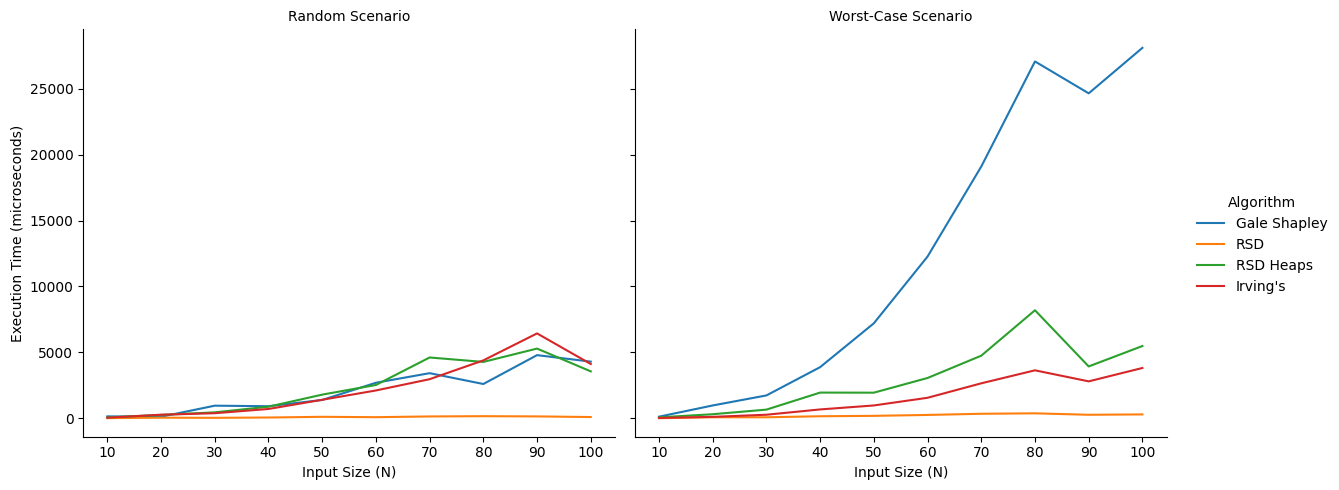

In [28]:
# @title Performance Chart Comparison

"""
  This chart visualizes the execution time of each algorithm (Gale Shapley,
  RSD, RSD Heaps, and Irving's) across different input sizes for both randomly
  generated and worst-case preference scenarios.
"""

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_results DataFrame exists from the previous data collection step
if 'df_results' not in locals():
    print("Error: df_results DataFrame not found. Please run the 'Data Collection for Performance Chart' cell first.")
else:
    # Get all unique N values to set as x-ticks
    all_n_values = sorted(df_results['N'].unique())

    # Plot random and worst-case scenarios separately for better clarity
    g = sns.FacetGrid(df_results, col='Scenario', height=5, aspect=1.2)
    g.map_dataframe(sns.lineplot, x='N', y='Time (microseconds)', hue='Algorithm', markers=True)
    g.add_legend(title='Algorithm')
    g.set_axis_labels('Input Size (N)', 'Execution Time (microseconds)')
    g.set_titles(col_template='{col_name} Scenario')

    # Explicitly set x-ticks for all N values
    g.set(xticks=all_n_values)

    g.tight_layout()
    plt.show()

In [35]:
# @title Generate and Test Individual Input Sizes

'''
  This cell will allow you to select how many men and women you would
  like to generate preference lists for and will time the algorithms' runtimes
  on the generated data. This allows the user to play with one specific
  number of participants and see how the algorithms perform, rather than a
  maximum number of participants.
'''

# Input validation for GS and RSD
while True:
    n_input = input("How many men and women do you want to generate (used for GS and RSD)? ")
    try:
        n = int(n_input)
        if n >= 1:
            break
        else:
            print("Please enter a number greater than or equal to 1.")
    except ValueError:
        print("Invalid input. Please enter a valid number.")

# Input validation for Irving's Algorithm
while True:
    m_input = input("How many participants do you want to generate (used for Irving's Algorithm)? ")
    try:
        m = int(m_input)
        if m >= 4 and m % 2 == 0:
            break
        else:
            print("Please enter an even number greater than or equal to 4.")
    except ValueError:
        print("Invalid input. Please enter a number.")

while True:
    print_choice = input("Do you want to print the matches? (y/n) ").lower()
    if print_choice in ['y', 'n']:
        break
    else:
        print("Invalid input. Please enter 'y' for yes or 'n' for no.")

print("\nRandomly Generated Data")
# Generate Random Preferences
men_prefs, women_prefs = generate_random_preferences(n)
preferences = generate_irving_preferences(m)

# Test and time Gale Shapley
GS_time = time_gale_shapely(men_prefs, women_prefs)
print(f"\tGale Shapley Time for {n} inputs: {GS_time * 1e6:.3f} microseconds")

# Test and time RSD
RSD_time = time_RSD(men_prefs, women_prefs)
print(f"\tRSD Time for {n} inputs: {RSD_time * 1e6:.3f} microseconds")

# Test and time RSD with heaps
RSD_heap_time = time_RSD_heaps(men_prefs, women_prefs)
print(f"\tRSD Heap Time for {n} inputs: {RSD_heap_time * 1e6:.3f} microseconds")

# Test and time Irving's Algorithm
IR_time = time_irvings(preferences)
print(f"\tIrving's Algorithm Time for {m} inputs: {IR_time * 1e6:.3f} microseconds")

if print_choice == 'y':
  print(print_gale_shapely(men_prefs, women_prefs, indent="\t"))
  print(print_RSD(men_prefs, women_prefs, indent="\t"))
  print(print_RSD_heaps(men_prefs, women_prefs, indent="\t"))
  print(print_irvings(preferences, indent="\t"))
else:
  print("\tNot printing results.")

print("\n--------------------------------------------------------------------------") # add a line

print("\nWorst-Case Data")
# Generate Worst-Case Preferences
men_prefs, women_prefs = generate_worst_case(n)
preferences = generate_irving_worst_case_preferences(m)

# Test and time Gale Shapley
GS_time = time_gale_shapely(men_prefs, women_prefs)
print(f"\tGale Shapley Time for {n} inputs: {GS_time * 1e6:.3f} microseconds")

# Test and time RSD
RSD_time = time_RSD(men_prefs, women_prefs)
print(f"\tRSD Time for {n} inputs: {RSD_time * 1e6:.3f} microseconds")

# Test and time RSD with heaps
RSD_heap_time = time_RSD_heaps(men_prefs, women_prefs)
print(f"\tRSD Heap Time for {n} inputs: {RSD_heap_time * 1e6:.3f} microseconds")

# Test and time Irving's Algorithm
IR_time = time_irvings(preferences)
print(f"\tIrving's Algorithm Time for {m} inputs: {IR_time * 1e6:.3f} microseconds")

if print_choice == 'y':
  print(print_gale_shapely(men_prefs, women_prefs, indent="\t"))
  print(print_RSD(men_prefs, women_prefs, indent="\t"))
  print(print_RSD_heaps(men_prefs, women_prefs, indent="\t"))
  print(print_irvings(preferences, indent="\t"))
else:
  print("\tNot printing results.")

How many men and women do you want to generate (used for GS and RSD)? 4
How many participants do you want to generate (used for Irving's Algorithm)? 4
Do you want to print the matches? (y/n) y

Randomly Generated Data
	Gale Shapley Time for 4 inputs: 21.520 microseconds
	RSD Time for 4 inputs: 15.716 microseconds
	RSD Heap Time for 4 inputs: 23.127 microseconds
	Irving's Algorithm Time for 4 inputs: 15.090 microseconds

	Gale Shapley Matching:
	M1 is matched with W4
	M4 is matched with W1
	M3 is matched with W3
	M2 is matched with W2


	Randomized Serial Dictatorship Matching:
	M3 is matched with W3
	M2 is matched with W1
	M1 is matched with W4
	M4 is matched with W2


	Randomized Serial Dictatorship (with heaps) Matching:
	M2 is matched with W1
	M4 is matched with W3
	M1 is matched with W4
	M3 is matched with W2


	Irving's Algorithm Matching:
	P1 ↔ P2
	P2 ↔ P1
	P3 ↔ P4
	P4 ↔ P3


--------------------------------------------------------------------------

Worst-Case Data
	Gale Shapley

## Averages and Plots for Our Run of the Experiment

The data in these cells reflect only the results of averaging all trials and inputs sizes for this particular run of the experiment. Because the experiment involves inherent randomness, the outcomes will vary across runs.

In [37]:
# @title Averaged Data

import pandas as pd
import time

"""
  This section takes hard-coded data that represents the averages across all
  trials and inputs sizes of our particular run. The data is stored in a Pandas
  DataFrame, which will then be used to generate performance comparison charts.
"""

all_results = []
scenarios = ['Random Scenario', 'Worst-Case Scenario']
algorithms = ['Gale Shapley', 'RSD', 'RSD Heaps', 'Irving\'s']
input_sizes = [50, 100, 500, 1000]
times = [
    1978.4065,
    88.807,
    1608.6925,
    1335.6755,
    5976.57,
    129.6365,
    3777.9235,
    5373.668,
    169584.3165,
    876.8915,
    171887.3825,
    596022.6045,
    851522.65,
    2045.78,
    394981.75,
    42015515,
    7748.7335,
    218.4065,
    2155.6085,
    976.602,
    30688.436,
    494.263,
    6693.1215,
    3998.2085,
    3576063.118,
    7165.597,
    189908.6055,
    573965.6355,
    29357740,
    24601.555,
    567091.15,
    4463229,
]

i = 0
for s in scenarios:
  for inp in input_sizes:
    for a in algorithms:
        all_results.append({
        'N': inp,
        'Scenario': s,
        'Algorithm': a,
        'Time (microseconds)': times[i]
        })
        i += 1

df_avg_results = pd.DataFrame(all_results)
print("Data collection complete.")

display(df_avg_results.tail(8))

Data collection complete.


,N,Scenario,Algorithm,Time (microseconds)
24,500,Worst-Case Scenario,Gale Shapley,3.576063e+06
25,500,Worst-Case Scenario,RSD,7.165597e+03
26,500,Worst-Case Scenario,RSD Heaps,1.899086e+05
27,500,Worst-Case Scenario,Irving's,5.739656e+05
28,1000,Worst-Case Scenario,Gale Shapley,2.935774e+07
29,1000,Worst-Case Scenario,RSD,2.460156e+04
30,1000,Worst-Case Scenario,RSD Heaps,5.670912e+05
31,1000,Worst-Case Scenario,Irving's,4.463229e+06


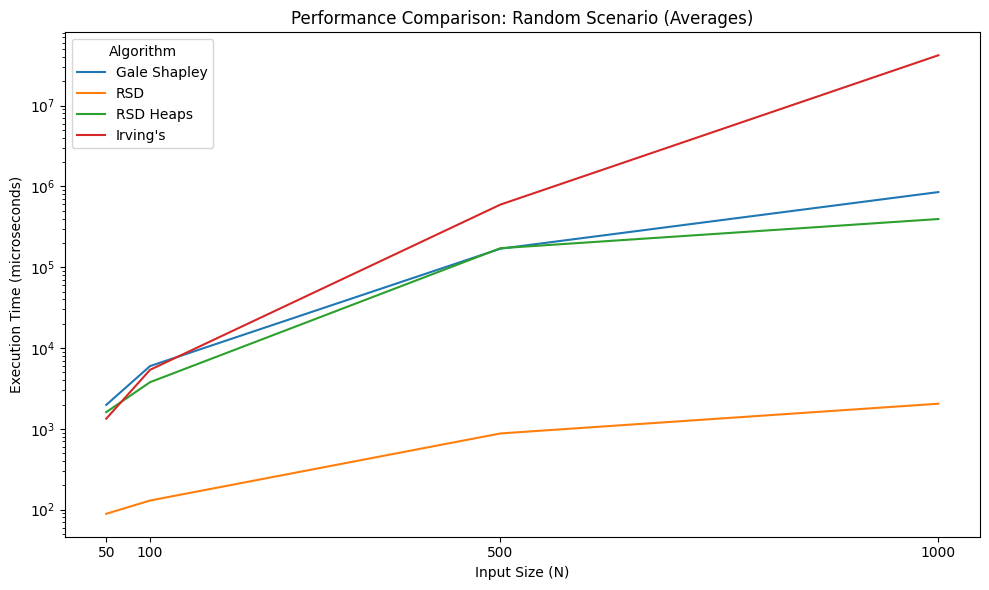

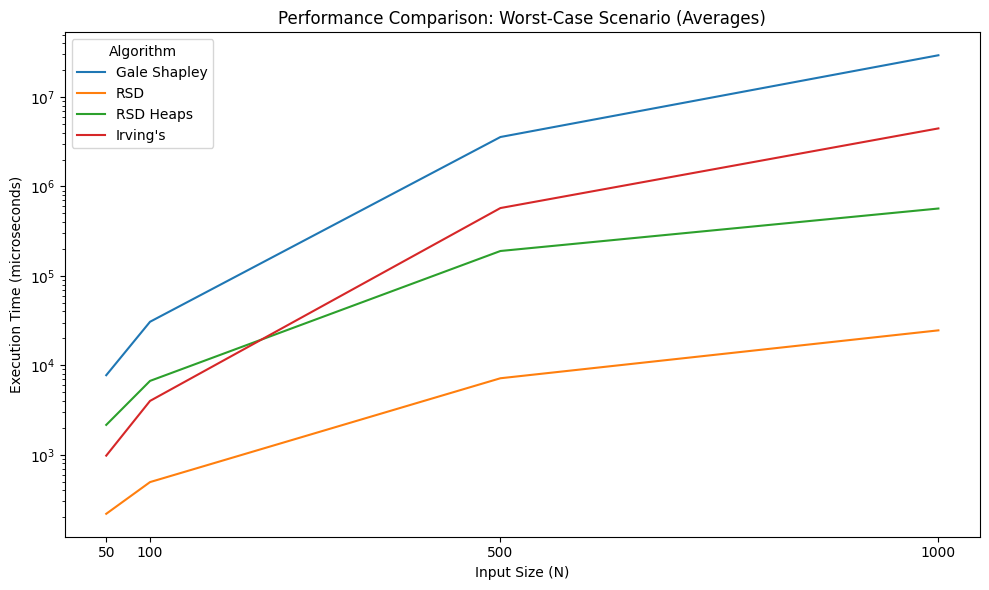

In [32]:
# @title Plotting Averaged Data

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_avg_results DataFrame exists from the previous data collection step
if 'df_avg_results' not in locals():
    print("Error: df_avg_results DataFrame not found. Please run the 'Data Collection for Performance Chart' cell first.")
else:
    # Get all unique N values to set as x-ticks
    all_n_values = sorted(df_avg_results['N'].unique())

    # Filter data for Random Scenario
    df_random = df_avg_results[df_avg_results['Scenario'] == 'Random Scenario']
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='N', y='Time (microseconds)', hue='Algorithm', data=df_random, markers=True)
    plt.title('Performance Comparison: Random Scenario (Averages)')
    plt.xlabel('Input Size (N)')
    plt.ylabel('Execution Time (microseconds)')
    plt.xticks(all_n_values)
    plt.yscale('log') # Set y-axis to logarithmic scale
    # Removed: plt.grid(True, which='both', ls='--', c='0.7')
    plt.legend(title='Algorithm')
    plt.tight_layout()
    plt.show()

    # Filter data for Worst-Case Scenario
    df_worst_case = df_avg_results[df_avg_results['Scenario'] == 'Worst-Case Scenario']
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='N', y='Time (microseconds)', hue='Algorithm', data=df_worst_case, markers=True)
    plt.title('Performance Comparison: Worst-Case Scenario (Averages)')
    plt.xlabel('Input Size (N)')
    plt.ylabel('Execution Time (microseconds)')
    plt.xticks(all_n_values)
    plt.yscale('log') # Set y-axis to logarithmic scale
    # Removed: plt.grid(True, which='both', ls='--', c='0.7')
    plt.legend(title='Algorithm')
    plt.tight_layout()
    plt.show()

## Get Hardware Characteristics

In [33]:
# @title Get Hardware Characteristics
import platform, subprocess

print("Python version:", platform.python_version())
!cat /proc/cpuinfo | grep 'model name' | uniq
!cat /proc/meminfo | grep MemTotal
!lsb_release -a

Python version: 3.12.12
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
MemTotal:       13286956 kB
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


## Sources Used
- Anthropic. Claude, Sonnet 4.5, Anthropic, 2025. Accessed 17 Nov. 2025; Used to write sample data generation functions.

- Austin, David. "The Stable Marriage Problem and School Choice." *American Mathematical Society*, March 2015, [ams.org](https://www.ams.org/publicoutreach/feature-column/fc-2015-03). Accessed 13 Nov. 2025.

- Google. Google Gemini, Gemini 2.5 Flash, Google, 2025. Accessed 17 Nov. 2025; Used for debugging and chart generation.

- Irving, Robert W. “An Efficient Algorithm for the ‘Stable Roommates’ Problem.” *Journal of Algorithms*, Volume 6, Issue 4, December 1985, Pages 577-595, [sciencedirect.com](https://www.sciencedirect.com/science/article/abs/pii/0196677485900331). Accessed 12 Nov. 2025.

- Kun, Jeremy. "Serial Dictatorships and House Allocation." *Math ∩ Programming*, October 2015, [jeremykun.com](https://www.jeremykun.com/2015/10/26/serial-dictatorships-and-house-allocation/). Accessed 13 Nov. 2025.

- OpenAI. ChatGPT, version 5.1, OpenAI, 2025. Accessed 12 Nov. 2025; Used to generate algorithms.